In [ ]:
#  == METHOD 2 ==
from scipy      import optimize

method_2 = "leastsq"

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return sqrt((x-xc)**2 + (y-yc)**2)

def f_2(c):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c)
    return Ri - Ri.mean()

center_estimate = x_m, y_m
center_2, ier = optimize.leastsq(f_2, center_estimate)

xc_2, yc_2 = center_2
Ri_2       = calc_R(*center_2)
R_2        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_2)**2)

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.optimize import curve_fit

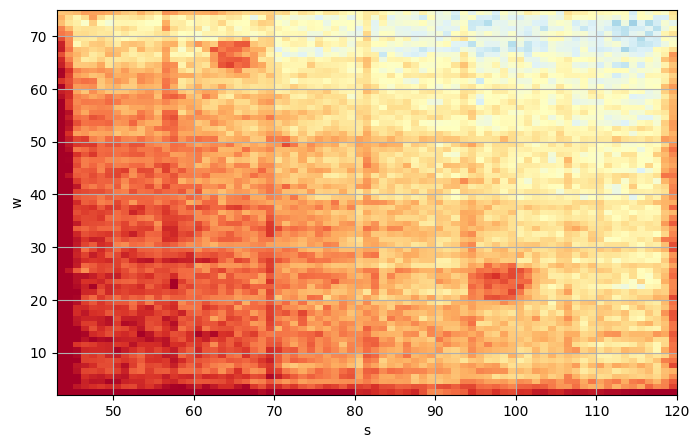

(73, 77)


In [4]:
file = uproot.open("root_files/gopa3+-ped.root")

w, x, y = file["h7"].to_numpy()

degree_of_rotation = -2.2
wT_rotated = ndimage.rotate(w.T, degree_of_rotation, reshape=False)

fig, ax = plt.subplots(figsize=(8, 5))
mesh = ax.pcolormesh(range(len(x)), y, wT_rotated, cmap="RdYlBu", vmin=0, vmax=80)
ax.set_xlabel("s")
ax.set_ylabel("w")
ax.set_ylim(2, 75)
ax.set_xlim(43, 120)
# fig.colorbar(mesh)
plt.grid()
plt.show()
print(wT_rotated[2:75, 43:120].shape)

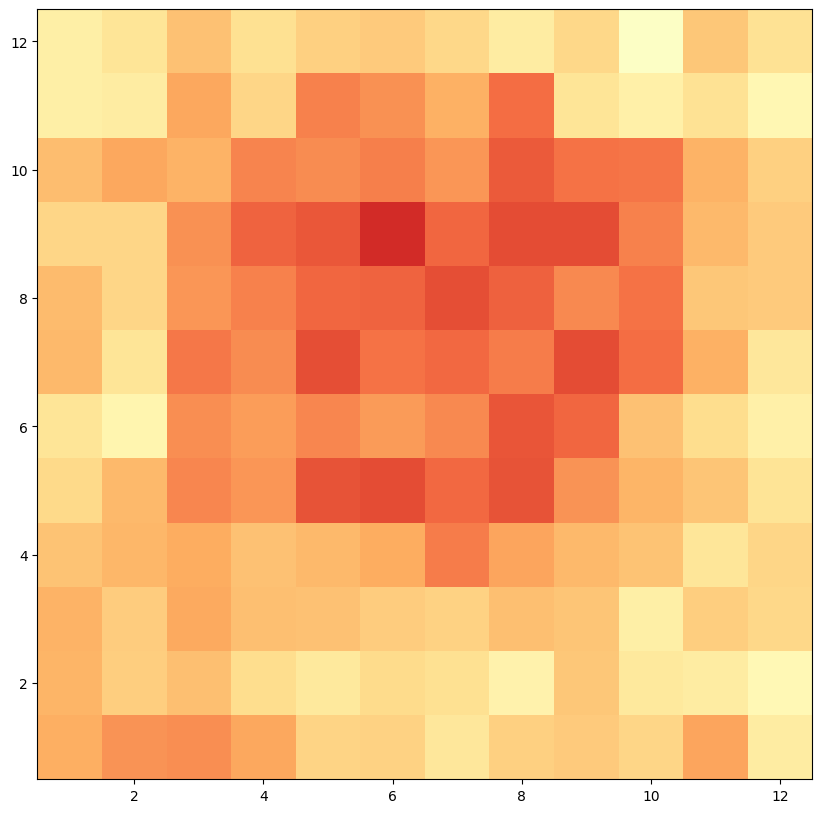

In [2]:
file = uproot.open("root_files/gopa3+-ped.root")
w, x, y = file["h7"].to_numpy()
plt.rcParams["figure.figsize"] = (10, 10)
w_tt = w[85:97, 15:27]
x_tt = list(range(1, w_tt.shape[0]+1))
y_tt = list(range(1, w_tt.shape[1]+1))
plt.pcolormesh(x_tt, y_tt, w_tt.T, cmap="RdYlBu", vmin=0, vmax=75)
# plt.set_xticks(x_tt)
# plt.set_yticks(y_tt)
# plt.grid(True)
# plt.xticks(False)
plt.show()

### Axis = 1

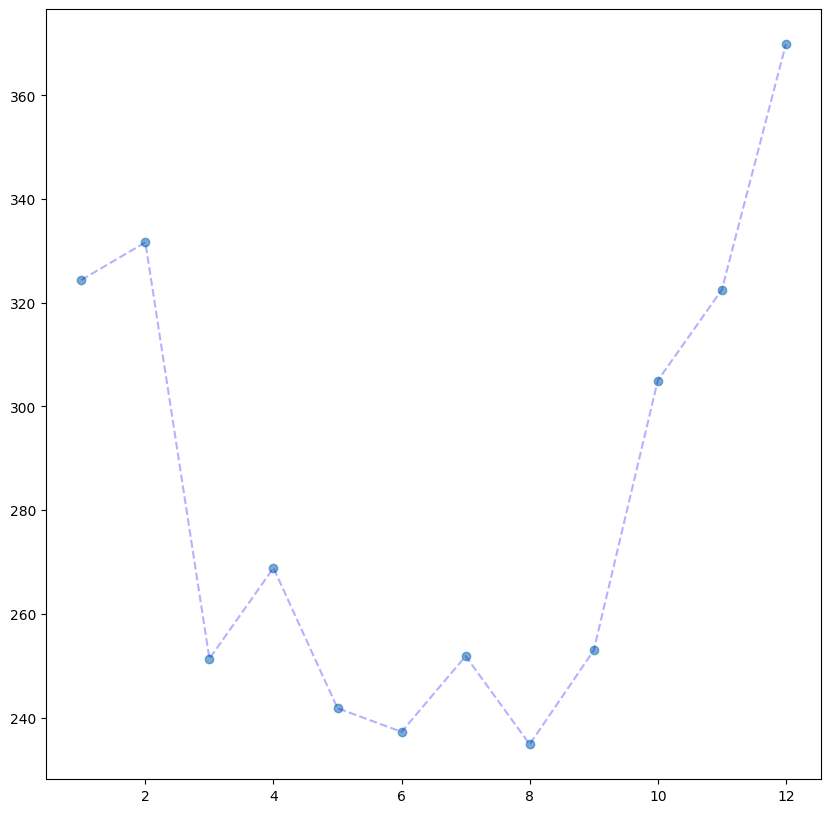

In [32]:
axis_ = 1
y = w_tt.sum(axis=int(axis_))
x = np.arange(1, w_tt.shape[0]+1)
plt.plot(x, y,'--', c='b', alpha=0.3, label='data')
plt.scatter(x, y, alpha=0.6)

[[Model]]
    Model(polynom_2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 12
    # variables        = 3
    chi-square         = 2534.22919
    reduced chi-square = 281.581021
    Akaike info crit   = 70.2328578
    Bayesian info crit = 71.6875778
[[Variables]]
    a:  3.81665685 +/- 0.45931992 (12.03%) (init = 0.9)
    b: -47.1431126 +/- 6.13382731 (13.01%) (init = 0.42)
    c:  382.386288 +/- 17.3430021 (4.54%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.973
    C(b, c) = -0.902
    C(a, c) = 0.803


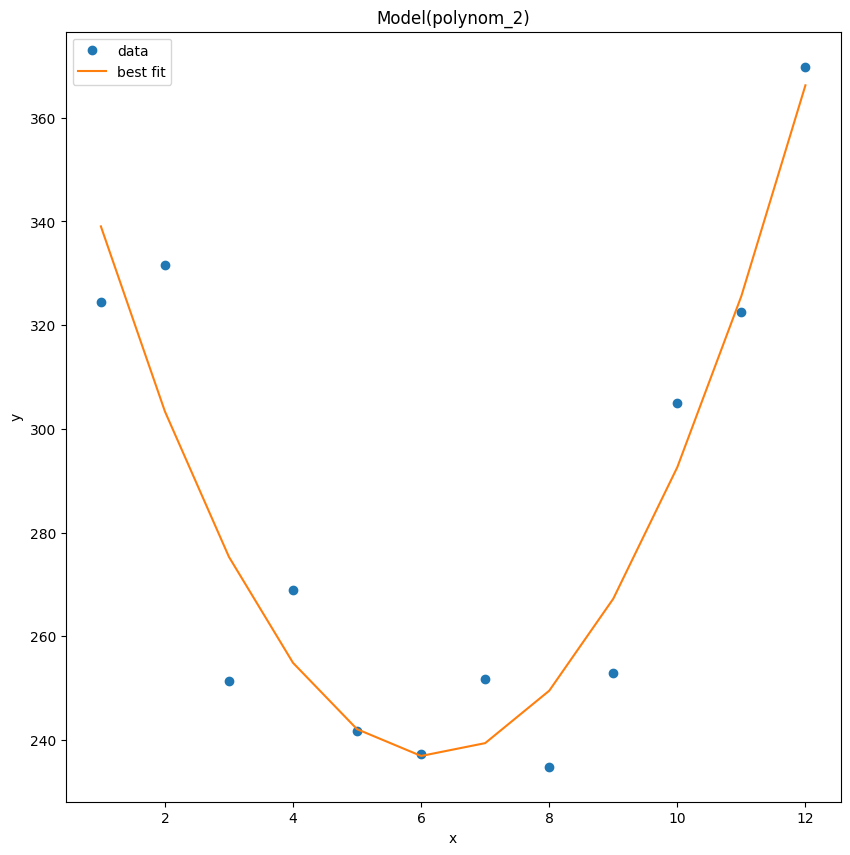

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters


# def damped_cosine(t, a, k, b):
    # return (1-a+a*np.cos(k*t))*np.exp(-b*t)
def polynom_2(x, a, b, c):
    return a*x*x+b*x+c

axis_ = 1
y = w_tt.sum(axis=int(axis_))
params = Parameters()
params.add('a', value=0.9, min=0)
params.add('b', value=0.42)
params.add('c', value=0.1)

dmodel = Model(polynom_2)
result = dmodel.fit(y, params, x=x)
print(result.fit_report())

result.plot_fit(show_init=False)

plt.show()

In [38]:
result.residual

array([ 14.65992968, -28.28333447,  23.95694702, -13.96968972,
         0.2870971 ,  -0.32268029, -12.44916839,  14.65751073,
        14.29734486, -12.37909226,   3.12746694,  -3.58233056])

In [ ]:
result

In [16]:
#  == METHOD 2 ==
from scipy import optimize

x_m = x.mean()
y_m = y.mean()

method_2 = "leastsq"

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f_2(c):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c)
    return Ri - Ri.mean()

center_estimate = x_m, y_m
center_2, ier = optimize.leastsq(f_2, center_estimate)

xc_2, yc_2 = center_2
Ri_2       = calc_R(*center_2)
R_2        = Ri_2.mean()
residu_2   = sum((Ri_2 - R_2)**2)

(778.9877212417418,
 318.7999572753906,
 array([778.6373532 , 778.039925  , 777.42492174, 775.32893914,
        775.69918984, 774.61283178, 773.32154513, 772.91864613,
        771.3427011 , 769.13792967, 768.71366821, 771.36395436,
        774.52778433]),
 773.9284145878978,
 122.02158682696626)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters
x = np.asarray(x)
y = np.asarray(y)

def damped_cosine(t, a, k, b):
    return (1-a+a*np.cos(k*t))*np.exp(-b*t)

params = Parameters()
params.add('a', value=0.9, min=0)
params.add('k', value=0.42)
params.add('b', value=0.1)

dmodel = Model(f_2)
result = dmodel.fit(y, params, t=x)
print(result.fit_report())

result.plot_fit(show_init=True)

plt.show()

ModuleNotFoundError: No module named 'circle_fit'

In [2]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt, cm, colors
from math import sqrt, pi

def calc_R(x,y, xc, yc):
    """
    calculate the distance of each 2D points from the center (xc, yc)
    """
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f(c, x, y):
    """
    calculate the algebraic distance between the data points
    and the mean circle centered at c=(xc, yc)
    """
    Ri = calc_R(x, y, *c)
    return Ri - Ri.mean()

def sigma(coords, x, y, r):
    """Computes Sigma for circle fit."""
    dx, dy, sum_ = 0., 0., 0.

    for i in range(len(coords)):
        dx = coords[i][1] - x
        dy = coords[i][0] - y
        sum_ += (sqrt(dx*dx+dy*dy) - r)**2
    return sqrt(sum_/len(coords))

def hyper_fit(coords, IterMax=99, verbose=False):
    """
    Fits coords to circle using hyperfit algorithm.
    Inputs:
        - coords, list or numpy array with len>2 of the form:
        [
    [x_coord, y_coord],
    ...,
    [x_coord, y_coord]
    ]
        or numpy array of shape (n, 2)
    Outputs:
        - xc : x-coordinate of solution center (float)
        - yc : y-coordinate of solution center (float)
        - R : Radius of solution (float)
        - residu : s, sigma - variance of data wrt solution (float)
    """
    X, X = None, None
    if isinstance(coords, np.ndarray):
        X = coords[:, 0]
        Y = coords[:, 1]
    elif isinstance(coords, list):
        X = np.array([x[0] for x in coords])
        Y = np.array([x[1] for x in coords])
    else:
        raise Exception("Parameter 'coords' is an unsupported type: " + str(type(coords)))

    n = X.shape[0]

    Xi = X - X.mean()
    Yi = Y - Y.mean()
    Zi = Xi*Xi + Yi*Yi

    #compute moments
    Mxy = (Xi*Yi).sum()/n
    Mxx = (Xi*Xi).sum()/n
    Myy = (Yi*Yi).sum()/n
    Mxz = (Xi*Zi).sum()/n
    Myz = (Yi*Zi).sum()/n
    Mzz = (Zi*Zi).sum()/n

    #computing the coefficients of characteristic polynomial
    Mz = Mxx + Myy
    Cov_xy = Mxx*Myy - Mxy*Mxy
    Var_z = Mzz - Mz*Mz

    A2 = 4*Cov_xy - 3*Mz*Mz - Mzz
    A1 = Var_z*Mz + 4.*Cov_xy*Mz - Mxz*Mxz - Myz*Myz
    A0 = Mxz*(Mxz*Myy - Myz*Mxy) + Myz*(Myz*Mxx - Mxz*Mxy) - Var_z*Cov_xy
    A22 = A2 + A2

    #finding the root of the characteristic polynomial
    y = A0
    x = 0.
    for i in range(IterMax):
        Dy = A1 + x*(A22 + 16.*x*x)
        xnew = x - y/Dy
        if xnew == x or not np.isfinite(xnew):
            break
        ynew = A0 + xnew*(A1 + xnew*(A2 + 4.*xnew*xnew))
        if abs(ynew)>=abs(y):
            break
        x, y = xnew, ynew

    det = x*x - x*Mz + Cov_xy
    Xcenter = (Mxz*(Myy - x) - Myz*Mxy)/det/2.
    Ycenter = (Myz*(Mxx - x) - Mxz*Mxy)/det/2.

    x = Xcenter + X.mean()
    y = Ycenter + Y.mean()
    r = sqrt(abs(Xcenter**2 + Ycenter**2 + Mz))
    s = sigma(coords,x,y,r)
    iter_ = i
    if verbose:
        print('Regression complete in {} iterations.'.format(iter_))
        print('Sigma computed: ', s)
    return x, y, r, s

def least_squares_circle(coords):
    """
    Circle fit using least-squares solver.
    Inputs:
        - coords, list or numpy array with len>2 of the form:
        [
    [x_coord, y_coord],
    ...,
    [x_coord, y_coord]
    ]
        or numpy array of shape (n, 2)
    Outputs:
        - xc : x-coordinate of solution center (float)
        - yc : y-coordinate of solution center (float)
        - R : Radius of solution (float)
        - residu : MSE of solution against training data (float)
    """

    x, y = None, None
    if isinstance(coords, np.ndarray):
        x = coords[:, 0]
        y = coords[:, 1]
    elif isinstance(coords, list):
        x = np.array([point[0] for point in coords])
        y = np.array([point[1] for point in coords])
    else:
        raise Exception("Parameter 'coords' is an unsupported type: " + str(type(coords)))

    # coordinates of the barycenter
    x_m = np.mean(x)
    y_m = np.mean(y)
    center_estimate = x_m, y_m
    center, _ = optimize.leastsq(f, center_estimate, args=(x,y))
    xc, yc = center
    Ri       = calc_R(x, y, *center)
    R        = Ri.mean()
    residu   = np.sum((Ri - R)**2)
    return xc, yc, R, residu

def plot_data_circle(x, y, xc, yc, R):
    """
    Plot data and a fitted circle.
    Inputs:
        x : data, x values (array)
        y : data, y values (array)
        xc : fit circle center (x-value) (float)
        yc : fit circle center (y-value) (float)
        R : fir circle radius (float)
    Output:
        None (generates matplotlib plot).
    """
    f = plt.figure(facecolor='white')
    plt.axis('equal')

    theta_fit = np.linspace(-pi, pi, 180)

    x_fit = xc + R*np.cos(theta_fit)
    y_fit = yc + R*np.sin(theta_fit)
    plt.plot(x_fit, y_fit, 'b-' , label="fitted circle", lw=2)
    plt.plot([xc], [yc], 'bD', mec='y', mew=1)
    plt.xlabel('x')
    plt.ylabel('y')
    # plot data
    plt.scatter(x, y, c='red', label='data')

    plt.legend(loc='best',labelspacing=0.1 )
    plt.grid()
    plt.title('Fit Circle')

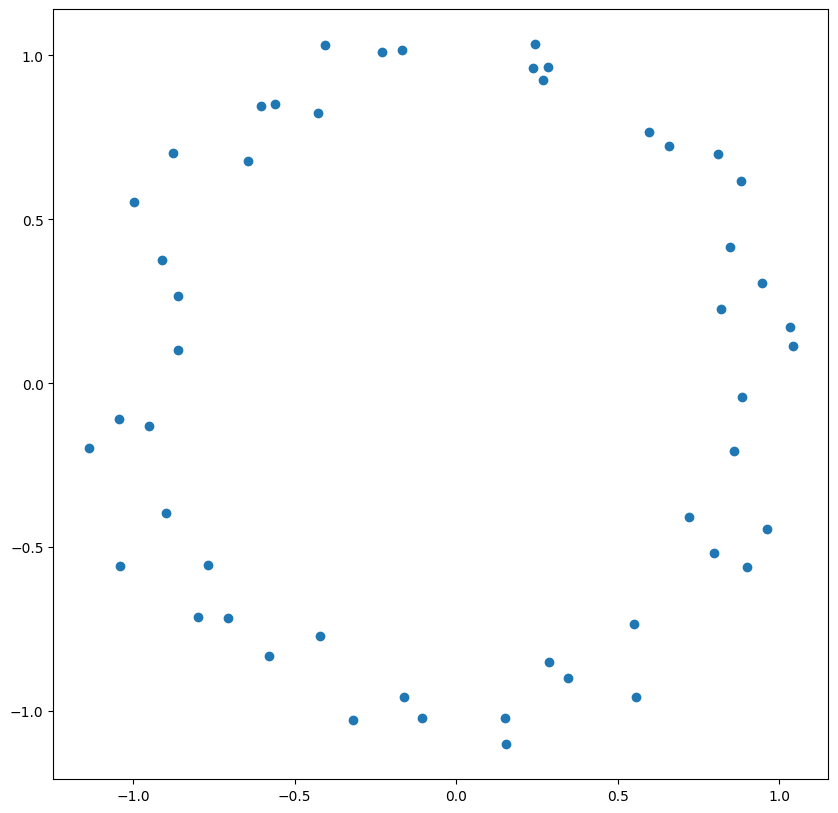

In [22]:
# import circle_fit as cf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

def get_unit_circle():
    data = make_circles(noise=.1, factor=.05)
    idx = np.argwhere(data[1]==0)
    x = data[0][idx, 0]
    y = data[0][idx, 1]
    return x, y

x, y = get_unit_circle()
plt.scatter(x, y)

In [23]:
x

array([[-0.31886759],
       [-0.79885002],
       [ 0.89921532],
       [-0.5794873 ],
       [ 0.34482111],
       [-0.42010838],
       [-0.16777787],
       [ 0.80928362],
       [-0.64305022],
       [-0.76681999],
       [ 0.84797513],
       [ 0.15016095],
       [ 0.79812507],
       [-0.8599087 ],
       [-0.60449977],
       [ 0.15329028],
       [-0.7051187 ],
       [-1.04105916],
       [-0.86134015],
       [ 0.88051488],
       [-1.04377457],
       [-0.42819857],
       [ 0.59802643],
       [ 0.55188696],
       [ 0.94591779],
       [-0.22945714],
       [-0.94924783],
       [-0.56054563],
       [ 0.96217522],
       [-0.87732761],
       [-0.91080898],
       [-0.1605652 ],
       [ 0.55714574],
       [ 0.65814032],
       [-0.99570896],
       [ 0.28309588],
       [ 0.82030562],
       [ 1.03246724],
       [ 0.23913156],
       [ 1.04315458],
       [ 0.85970965],
       [ 0.26962068],
       [-0.89736503],
       [ 0.2430497 ],
       [ 0.72061865],
       [-0

In [26]:
y = w_tt.sum(axis=int(axis_)).reshape(12, 1)
x = np.arange(1, w_tt.shape[0]+1).reshape(12, 1)

x.shape, y.shape

((12, 1), (12, 1))

In [27]:
coords = [[x[i][0], y[i][0]] for i in range(len(x))]

In [29]:
xc,yc,r,s = hyper_fit(coords)

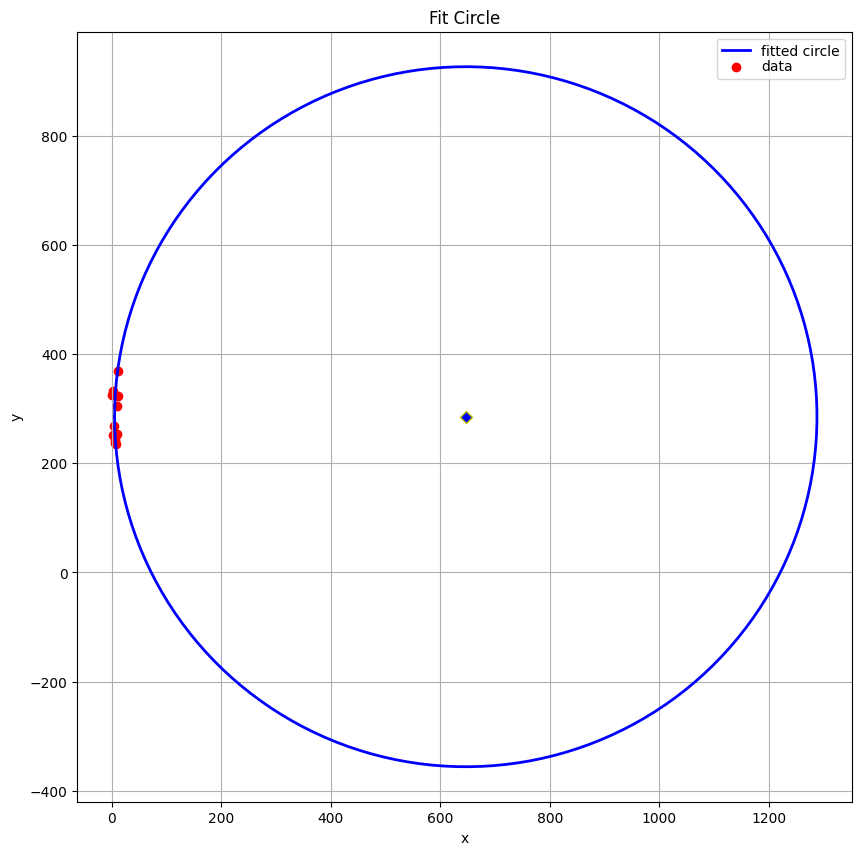

In [30]:
plot_data_circle(x,y,xc,yc,r)

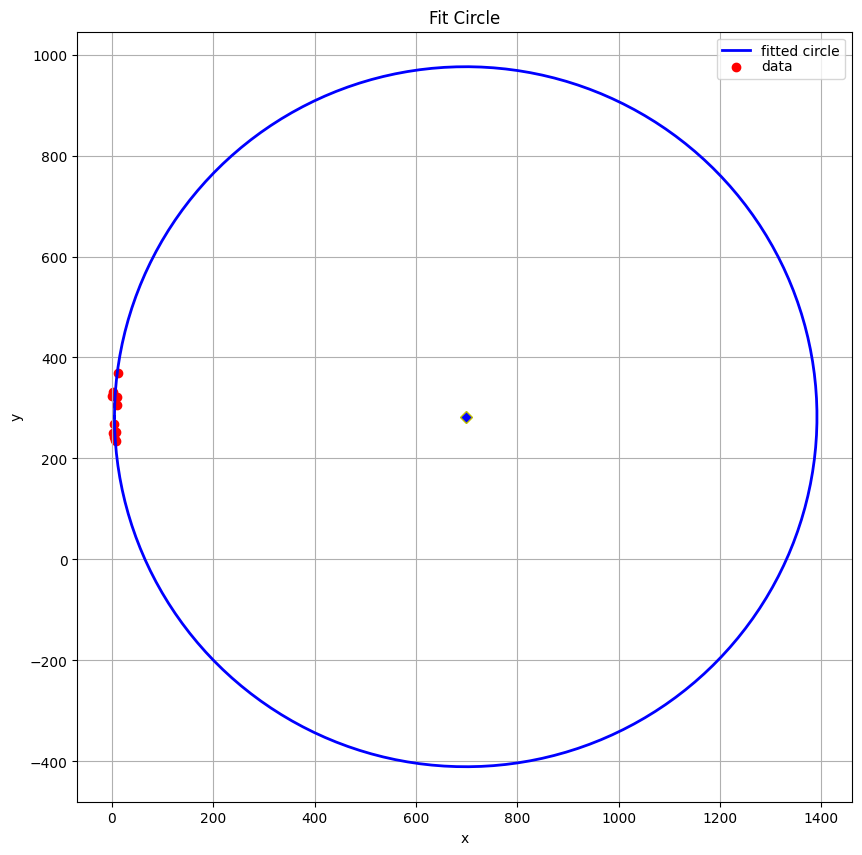

In [31]:
xc, yc, r, s = least_squares_circle(coords)
plot_data_circle(x,y,xc,yc,r)